# Relatório Final - Reembolsos da Câmara dos Deputados

## Introdução

A motivação em desenvolver esse trabalho advém do fato de querer investigar os gastos públicos dos deputados federais brasileiros. Cada político tem o direito a ter reembolso quando gastam seu dinheiro em atividade que permitam "servir melhor o povo". Então é importante que esses gastos sejam monitorados, para saber como cada deputados está utilizando recursos para pedir reembolso com verbas públicas.

Com as diversas notícias e acusações de corrupção dos políticos é de se imaginar que quando envolve dinheiro é provável que se vá encontrar dados suspeitos. 

Sendo assim, com os conhecimentos adquiridos durante o curso, com a utlização da linguagem Python  e com a ajuda das suas bibliotecas, o objetivo do trabalho é analisar os gastos do deputados.

## Dados Utilizados 

Foi utilizada a base de dados a base [Brazil's House of Deputies Reimbursements](https://www.kaggle.com/epattaro/brazils-house-of-deputies-reimbursements), disponibilizada pelo usuário epattaro do site Kaggle usando dados obtidos do portal da transparência da Câmara dos Deputados. Esta base contém informações sobre os gastos dos deputados entre os anos de 2009 e 2017.

In [60]:
import pandas as pd
from IPython.display import clear_output
from concat_df import concat_df
# Carregar os dados
df = concat_df(processed=True)
df.head()

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week
0,0,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.00,Maintenance of Office,TIM CELULAR S/A,411,2009,5,1
1,1,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.00,Maintenance of Office,TIM CELULAR S/A,429,2009,5,1
2,2,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.00,Maintenance of Office,TIM CELULAR S/A,109,2009,5,1
3,3,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.00,Maintenance of Office,TIM CELULAR S/A,68,2009,5,1
4,4,0,2009-09-25 00:00:00,1772,PSB,SP,Abelardo Camarinha,2418000000131.00,Fuels and lubricants.,AUTO POSTO ALVORADA,4395,2009,9,4


## Pré-Processamento

Realizamos o processo de limpeza e transformação dos dados acima, sendo o processo descrito a seguir.

### Transformação de Dados

#### receipt_social_security_number

In [ ]:
# ADICIONAR CÓDIGO AQUI

### Limpeza de Dados

In [ ]:
# ADICIONAR CÓDIGO AQUI

## Perguntas

Foram elaboradas no total sete perguntas para serem respondidas com o conjunto de dados apresentado anteriormente, sendo estas perguntas apresentadas a seguir.

### 1. Qual seria a média dos valores dos recibos para 2021? 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dft = df.groupby('year').mean()

sns.scatterplot(data=dft, x='year', y='receipt_value')
#dft['receipt_value'].plot()

In [ ]:
dft.index

In [ ]:
# ADICIONAR CÓDIGO AQUI
from scipy.stats import linregress

regress = linregress(dft.index, dft['receipt_value'])

a = regress.slope
b = regress.intercept

def predict(year):
    return year * a + b

In [ ]:
import numpy as np

np.corrcoef(dft.index, dft['receipt_value'])

In [ ]:
yhat = [predict(year) for year in range(2009, 2018)]

plt.plot(dft.index, dft['receipt_value'])
plt.plot(dft.index, yhat, 'r--')

In [ ]:
predict(2021)

Como se percebe há uma correlação muito forte entre o ano e o valor médio dos recibos. Por meio de uma regressão linear, podemos obter uma boa estimativa de quanto será o valor médio do recibo neste ano de 2021, no caso, o valor obtido foi de **R\$ 848,79**.

### 2. Existem deputados que são outliers com relação a gastos com gasolina? Se sim, quais? 

In [ ]:
# ADICIONAR CÓDIGO AQUI

### 3. Qual empresa de combustível recebeu mais? Existe alguma relação com possíveis outliers da análise anterior? 

In [ ]:
# ADICIONAR CÓDIGO AQUI

### 4. Existem estabelecimentos com compras de apenas um deputado? 

In [ ]:
# ADICIONAR CÓDIGO AQUI
unique_establishment_name = df['establishment_name'].unique()

one_deputy_establishment = []
for establishment in unique_establishment_name:
    if len(df.loc[df['establishment_name'] == establishment, 'deputy_name'].unique()) == 1:
        one_deputy_establishment.append(establishment)
        
one_deputy_establishment

### 5. Qual deputado tem a maior média de gastos? 

In [6]:
# ADICIONAR CÓDIGO AQUI
dft = df.groupby('deputy_name').mean()
dft.sort_values(by='receipt_value', ascending=False).head()

,Unnamed: 0,bugged_date,deputy_id,receipt_social_security_number,receipt_value,year,month,day_of_week
deputy_name,,,,,,,,
Adão Pretto,1730.000000,0.000000,846.0,7.141271e+12,17700.000000,2009.000000,1.000000,3.000000
Armando Vergílio,33734.547222,0.105556,2321.0,1.485186e+13,3159.963889,2012.652778,6.491667,2.527778
Lucas Vergilio,190320.102703,0.110811,3063.0,1.021649e+13,3118.405405,2015.902703,5.656757,2.159459
Renato Cozzolino,309893.500000,0.000000,1680.0,1.475869e+13,2729.500000,2011.000000,1.000000,2.875000
Altineu Côrtes,17991.693878,0.081633,3005.0,7.502593e+12,2721.387755,2015.932945,6.055394,2.393586


In [8]:
df.loc[df['deputy_name'] == 'Adão Pretto'] 

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week
1690,1730,0,2009-01-15 00:00:00,846,PT,RS,Adão Pretto,7.141271e+12,Dissemination of the Parliamentary Activity.,PONTOCOM GRÁFICA E EDITORA,17700,2009,1,3


Como pode ser visto através da ordenação descrescente do dataframe baseado na média dos valores dos recibos de cada deputado, o deputado com maior média de gastos foi o Adão Pretto. O curioso é que esse deputado possui apenas um recibo cadastrado em todo o dataframe. Após pesquisas, constatamos que [tal deputado foi a óbito aproxidamente um mês depois da data do recibo](https://pt.wikipedia.org/wiki/Adão_Pretto).

### 6. Qual foi o deputado que mais gastou em ano eleitoral? 

In [7]:
# ADICIONAR CÓDIGO AQUI
deputy_election_years = [2010, 2014]
local_election_years = [2012, 2016]

df_deputy = df.loc[df['year'].isin(deputy_election_years)]
df_deputy = df_deputy.groupby('deputy_name').sum()
df_deputy.sort_values(by='receipt_value', ascending=False).head()

,Unnamed: 0,bugged_date,deputy_id,receipt_social_security_number,receipt_value,year,month,day_of_week
deputy_name,,,,,,,,
Bruno Araújo,62928221,34,2476953,1.603096e+16,1021203,2783178,8991,3242
Edio Lopes,77403036,25,1698012,4.772782e+15,985666,1879356,6156,2126
Gladson Cameli,131601883,30,1939095,5.325921e+15,980001,2114678,6282,2506
Paes Landim,296249603,33,94800,4.774131e+15,936326,2384638,7430,2522
Silas Câmara,132763731,16,567126,1.477913e+15,935034,887310,2517,984


In [9]:
df_local = df.loc[df['year'].isin(local_election_years)]
df_local = df_local.groupby('deputy_name').sum()
df_local.sort_values(by='receipt_value', ascending=False).head()

,Unnamed: 0,bugged_date,deputy_id,receipt_social_security_number,receipt_value,year,month,day_of_week
deputy_name,,,,,,,,
Felipe Bornier,187087667,15,2929600,9.843168e+15,1175485,3222440,10806,3735
Edio Lopes,99153135,16,1903446,5.347531e+15,1124023,2108716,6753,2316
Paes Landim,347667790,17,104960,5.420658e+15,1039567,2642356,7921,2909
Fábio Faria,169008033,18,2767277,7.360609e+15,1021506,3047020,10185,3599
Flaviano Melo,138010839,19,2078352,8.677099e+15,1007227,2280028,7435,2835


In [10]:
df_final = df.loc[df['year'].isin(deputy_election_years + local_election_years)]
df_final = df_final.groupby('deputy_name').sum()
df_final.sort_values(by='receipt_value', ascending=False).head()

,Unnamed: 0,bugged_date,deputy_id,receipt_social_security_number,receipt_value,year,month,day_of_week
deputy_name,,,,,,,,
Edio Lopes,176556171,41,3601458,1.012031e+16,2109689,3988072,12909,4442
Felipe Bornier,305931076,33,5009616,1.804567e+16,2060048,5508548,18023,6531
Paes Landim,643917393,50,199760,1.019479e+16,1975893,5026994,15351,5431
Silas Câmara,328715898,30,1356730,4.048839e+15,1929109,2124238,6310,2392
Zé Geraldo,768857874,44,3850442,1.289901e+16,1891848,4542704,14627,5068


Para melhor análise, foi feita a avaliação dos maiores gastos nos anos eleitorais para deputados (2010 e 2014), para prefeitos (2012 e 2016) e por fim de todos os 4 anos juntos. Como pode ser visto nas ordenações de maior para menor dos dataframes expostos, o deputado com maior gasto em anos eleitorais que envolvem eleições de deputados foi **Bruno Araújo**, já nos anos leitorais que envolvem eleições para prefeitos foi **Felipe Bornier** e por fim em todos os 4 anos eleitorais no período estudado o deputado que mais gastou foi **Edio Lopes**. É interessante notar como Edio aparece entre os dois primeiros lugares em todos os casos.

### 7. Qual é a categoria onde os gastos são maiores? E qual é a categoria onde os gastos são menores?

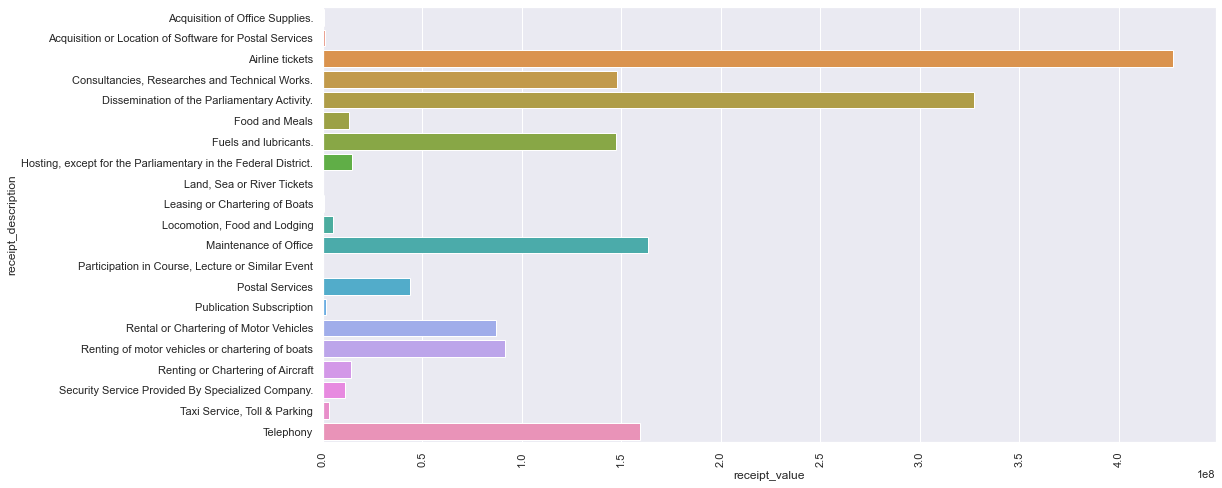

In [69]:
# ADICIONAR CÓDIGO AQUI
dfg = df.groupby('receipt_description').sum()
#df_final.sort_values(by='receipt_value', ascending=False).head()
sns.set(rc = {'figure.figsize':(16, 8)})


bar_plot = sns.barplot(data=dfg, y=dfg.index, x='receipt_value')

for item in bar_plot.get_xticklabels():
    item.set_rotation(90)

Pelo gráfico, podemos visualizar que a categoria **Airline tickets** (passagens áreas) é que teve o maior volume de gastos, com aproximadamente **R\$ 425.000.000,00**, contudo, determinar a categoria com o menor volume de gastos pelo gráfico é um literalmente um teste ótico. Vejamos a seguir quem foi a menor:

In [72]:
dfg.sort_values(by='receipt_value', ascending=True)[:3]

,Unnamed: 0,bugged_date,deputy_id,receipt_social_security_number,receipt_value,year,month,day_of_week
receipt_description,,,,,,,,
"Land, Sea or River Tickets",569385773,0,8256752,179804648272354688.00,343647,7582620,23837,10869
"Participation in Course, Lecture or Similar Event",10277752,2,163950,495674507004638.00,344494,127028,324,159
Leasing or Chartering of Boats,31508032,1,391466,2835741353354570.00,484181,354607,1126,479


Pela tabela acima, temos que a categoria **Land, Sea or River Tickets** possui o menor volume de gastos, porém é quase um empate com a categoria **Participation in Course, Lecture or Similar Event**, dada a característica da primeira categoria, e a categoria de maiores gastos, pode-se notar que definitivamente os deputados preferem viajar de avião a(crase) utilizar outros meios de transporte.

## Conclusão

ADICIONAR